# Test read results

Must run after run_pipeline

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from src.erebus_nicholasconnors.utility.h5_serializable_file import H5Serializable
import src.erebus_nicholasconnors.utility.utils as utils 
from uncertainties import ufloat
from src.erebus_nicholasconnors.photometry_data import PhotometryData
from src.erebus_nicholasconnors.utility.run_cfg import ErebusRunConfig
from src.erebus_nicholasconnors.erebus import Erebus
import numpy as np
import matplotlib.pyplot as plt
from src.erebus_nicholasconnors.joint_fit_results import JointFitResults
from src.erebus_nicholasconnors.individual_fit_results import IndividualFitResults
from src.erebus_nicholasconnors.plotting import plot_joint_fit
from src.erebus_nicholasconnors.plotting import plot_fnpca_individual_fit

In [2]:
joint_fit = JointFitResults.load("./test_output/lhs1478b_joint_fit.h5")

In [3]:
print(joint_fit.results)

{'t_sec_offset': 0.0+/-0, 'fp': -6.859132875684141e-06+/-5.018005264224406e-05, 't0': 2458786.75425+/-0, 'rp_rstar': 0.0462+/-0, 'a_rstar': 16.119+/-0, 'p': 1.9495378+/-0, 'inc': 87.452+/-0, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1_0': -0.0379960295691784+/-0.14906171225328638, 'pc2_0': -0.10345471454560634+/-0.11367830100010648, 'pc3_0': 0.34588130566817715+/-0.3104805979811036, 'pc4_0': -0.2889492256753621+/-0.40137091721157686, 'pc5_0': -0.5722236299041373+/-0.3516657761383121, 'exp1_0': 0.0+/-0, 'exp2_0': 0.0+/-0, 'a_0': -0.007399285061816208+/-0.0015070583240273708, 'b_0': 0.00047851898164130317+/-0.00010962526547404855, 'pc1_1': -0.7216018421704862+/-0.05907774814467831, 'pc2_1': 0.01385776455861256+/-0.14424193942013236, 'pc3_1': -0.27481697056165794+/-0.34819599723795325, 'pc4_1': 0.5608158955022522+/-0.39009780676234274, 'pc5_1': -0.20422713504093+/-0.3633697091138985, 'exp1_1': 0.0+/-0, 'exp2_1': 0.0+/-0, 'a_1': -0.0019914319891260936+/-0.0018276752293899432, 'b_1': 0.0001776238192

Offset:  0.0 hours


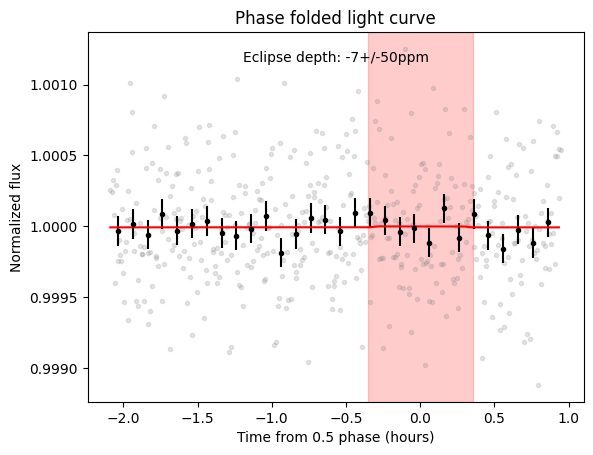

In [5]:
plot_joint_fit(joint_fit, show=True)

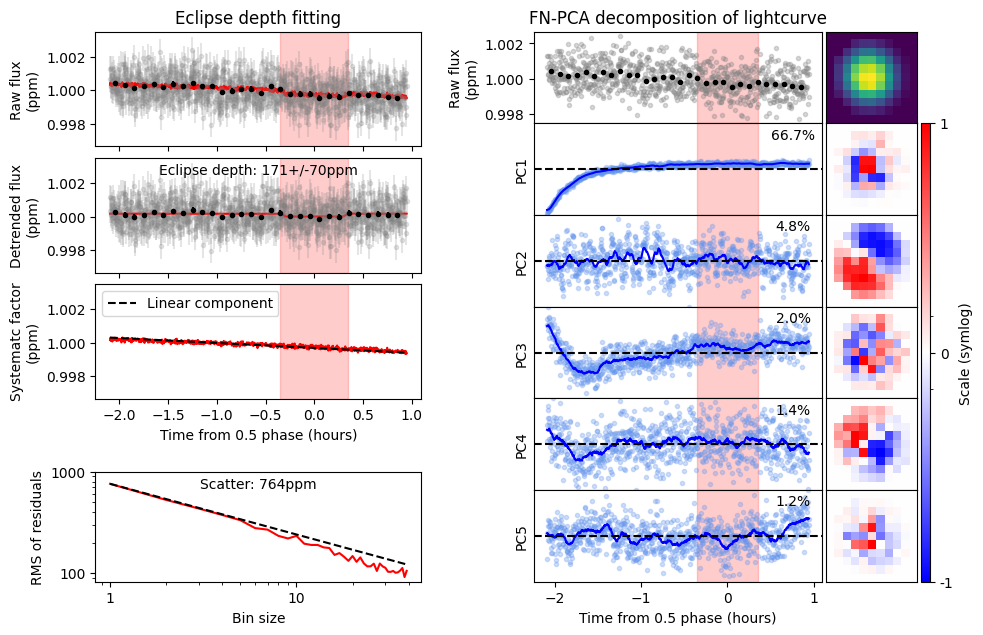

In [7]:
visit1 = IndividualFitResults.load("./test_output/LHS1478b_visit_1_jw03730013001.h5")
plot_fnpca_individual_fit(visit1, show=True)

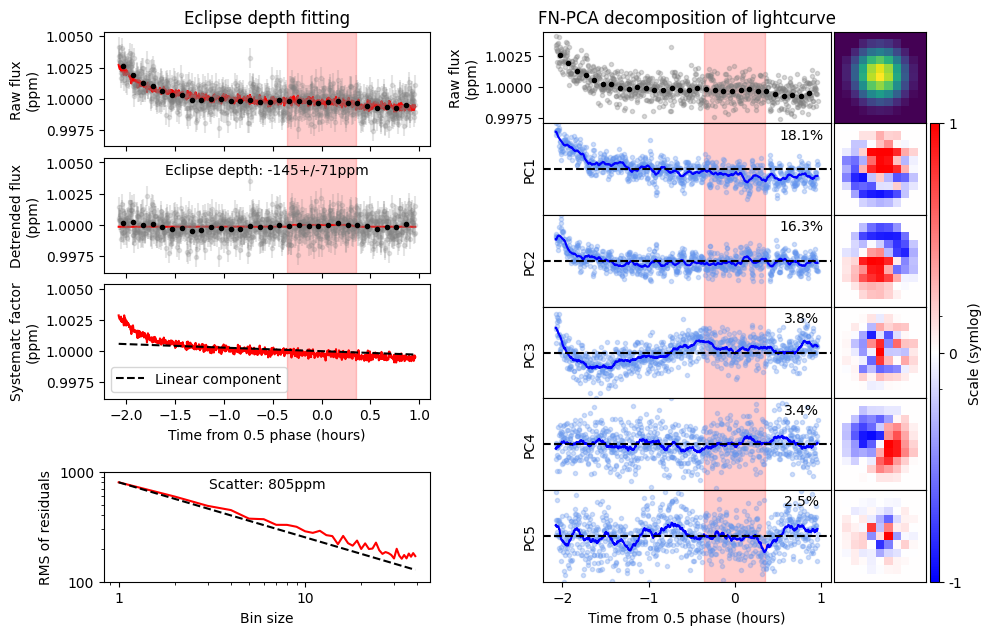

In [10]:
visit2 = IndividualFitResults.load("./test_output/LHS1478b_visit_2_jw03730012001.h5")
plot_fnpca_individual_fit(visit2, show=True)

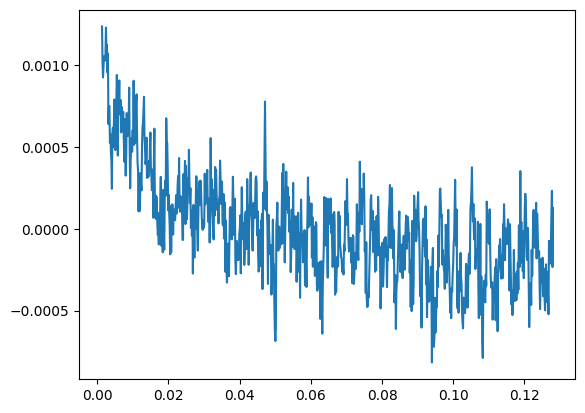

In [14]:
plt.plot(visit2.time, visit2.eigenvalues[0])
plt.show()

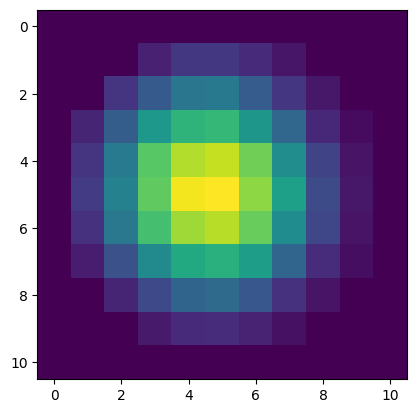

In [15]:
plt.imshow(visit1.frames[-1])

In [16]:
print(dir(visit1))

['_H5Serializable__JSONDecoder', '_H5Serializable__JSONEncoder', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'config_hash', 'eigenvalues', 'eigenvectors', 'exclude_keys', 'first_frame', 'flux_model', 'frames', 'load', 'load_from_path', 'order', 'pca_variance_ratios', 'planet_name', 'raw_flux', 'results', 'save_to_path', 'start_time', 'systematic_factor', 'time', 'visit_name']


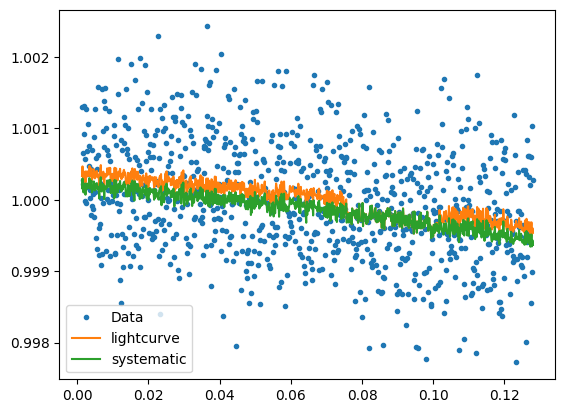

In [23]:
plt.plot(visit1.time, visit1.raw_flux,marker='.', linestyle='', label='Data')
plt.plot(visit1.time, visit1.flux_model, label='lightcurve')
plt.plot(visit1.time, visit1.systematic_factor, label='systematic')
plt.legend()
plt.show()